# Lab 2 - Classification

Team: Frank Sclafani, Jan Shook, and Leticia Valadez

> VERSION: Updated by Jan
           * Added a linear regression that works ... left the old LR at the bottom that didn't work
           * baseline for Leticia and Jan to work on together


## TV News Channel Commercial Detection

Our team selected this dataset for two reasons: 1) It has a large number of instances (129,685, which is greater than the requirement of at least 30,000) and enough attributes (14, which is greater than the requirement of at least 10), and 2) It looks like an interesting dataset (detecting commercials). Initial questions of interest are how do you detect commercials from this data? Can a model be trained to detect and skip (or remove) commercials? If so, would this solution be robust enough for commercial products like TiVo?

This dataset is from the UCI Machine Learning website (https://archive.ics.uci.edu/ml/datasets/TV+News+Channel+Commercial+Detection+Dataset). It consists of popular audio-visual features of video shots extracted from 150 hours of TV news broadcast of 3 Indian and 2 international news channels (30 Hours each). In the readme accompanying the data, the authors describe the potential benefits of this data as follows:

> Automatic identification of commercial blocks in news videos finds a lot of applications in the domain of television broadcast analysis and monitoring. Commercials occupy almost 40-60% of total air time. Manual segmentation of commercials from thousands of TV news channels is time consuming, and economically infeasible hence prompts the need for machine learning based Method. Classifying TV News commercials is a semantic video classification problem. TV News commercials on particular news channel are combinations of video shots uniquely characterized by audio-visual presentation. Hence various audio visual features extracted from video shots are widely used for TV commercial classification. Indian News channels do not follow any particular news presentation format, have large variability and dynamic nature presenting a challenging machine learning problem. Features from 150 Hours of broadcast news videos from 5 different (3 Indian and 2 International News channels) news channels. Viz. CNNIBN, NDTV 24X7, TIMESNOW, BBC and CNN are presented in this dataset. Videos are recorded at resolution of 720 X 576 at 25 fps using a DVR and set top box. 3 Indian channels are recorded concurrently while 2 International are recorded together. Feature file preserves the order of occurrence of shots.

### Objective: Classify Video Attributes as Commercial or Non-commercial

This dataset has already been classified as commercial (+1) or non-commercial (-1) in the Dimension Index attribute. Hence, in subsequent analysis, we will be able to train and compare our data models against the target variable that has already created to determine the effectiveness of the model.

### Techniques Applied in this Project

#### Data Preparation

> The SVM Light approach to persisting sparse matrix arrays was used loaded into a Pandas dataframe

> The X and Y axis in the SVM Light approach was combined into a two-dimensional Pandas dataframe

> Columns that have little merit to the intial analysis were deleted

> Pandas columns with empty values (i.e., all zeroes) were deleted

> Different type of row and / or columns were separated into different dataframes to analyize the data differently

#### Data Visualization

> The Hexagon Bin Plot was used to visualize the complete dataset, and it appears a linear coorelation exists among attributes

> Individual scatter plots were created for each attribute (non-bin related)

## About this Notebook

This Jupyter (v4.3.0) notebook was developed on Windows 10 Pro (64 bit) using Anaconda v4.4.7 and Python v3.*.

Packages associated with Anaconda were extracted as follows:

> conda install -c anaconda pandas

> conda install -c anaconda numpy 

In addition to the packages in Anaconda (and outside of the Anaconda ecosystem), this notebook uses Plotly (v2.2.3) for visualization. The zip file for Plotly can be found on GitHub at (https://github.com/plotly/plotly.py). You can install the Plotly packages as follows:

> pip install plotly

The version of Pandas and its dependencies are shown below.

## Table of Contents

* <a href="#Section 1: Data Understanding">Section 1: Data Understanding</a>  
> <a href="#Section 1.1: About this Dataset (Summary)">Section 1.1: About this Dataset (Summary)</a>  
> <a href="#Section 1.2: Description of the Attributes">Section 1.2: Description of the Attributes</a>  
> <a href="#Section 1.3: Potentially Useful Attribues">Section 1.3: Potentially Useful Attribues</a>  
> <a href="#Section 1.4: Columns and Data Types">Section 1.4: Columns and Data Types</a>  

* <a href="#Section 2: Data Preparation">Section 2: Data Preparation</a>  
> <a href="#Section 2.1: Download Files">Section 2.1: Download Files</a>  
> <a href="#Section 2.2: Pivot the Y-axis">Section 2.2: Pivot the Y-axis</a>  
> <a href="#Section 2.3: Convert Sparse Matrix Array to an Array">Section 2.3: Convert Sparse Matrix Array to an Array</a>  
> <a href="#Section 2.4: Concatenate the Y-axis before the X-axis">Section 2.4: Concatenate the Y-axis before the X-axis</a>  
> <a href="#Section 2.5: Convert the Arrays into Pandas Dataframes">Section 2.5: Convert the Arrays into Pandas Dataframes</a>  
> <a href="#Section 2.6: Rename Columns from Integers to Labels">Section 2.6: Rename Columns from Integers to Labels</a>    
> <a href="#Section 2.7: Inspecting Missing Values">Section 2.7: Inspecting Missing Values</a>  
> <a href="#Section 2.8: Concatenate the Five Pandas Dataframes">Section 2.8: Concatenate the Five Pandas Dataframes</a>  

* <a href="#Section 3: Visualizing the Data">Section 3: Visualizing the Data</a>  
> <a href="#Section 3.1: Attributes: Box Plots">Section 3.1: Attributes: Box Plots</a>  
> <a href="#Section 3.2: Attributes: Hexbin Plots">Section 3.2: Attributes: Hexbin Plots</a>  
> <a href="#Section 3.3: Principal Component Analysis (PCA)">Section 3.3: Principal Component Analysis (PCA)</a>  

* <a href="#Section 4: Modeling">Section 4: Modeling</a>  
> <a href="#Section 4.1: Logistic Regression">Section 4.1: Logistic Regression</a>  
> <a href="#Section 4.2: Support Vector Machines">Section 4.2: Support Vector Machines</a>  

* <a href="#Section 4: Modeling (New)"><span style="color:red">Section 4: Modeling (New)</span></a>
> <a href="#Section 4.1: Linear Regression"><span style="color:red">Section 4.1: Linear Regression</span></a>

In [1]:
%%time

# Runtime Expectation: The following cell runs about 30 seconds on the first execution of this notebook, and a second or two after that.

import pandas as pd
import numpy as np

pd.show_versions()

import warnings
warnings.filterwarnings('ignore')


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.3.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 42 Stepping 7, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.20.3
pytest: 3.2.1
pip: 9.0.1
setuptools: 36.5.0.post20170921
Cython: 0.26.1
numpy: 1.13.3
scipy: 1.0.0
xarray: None
IPython: 6.1.0
sphinx: 1.6.3
patsy: 0.4.1
dateutil: 2.6.1
pytz: 2017.2
blosc: None
bottleneck: 1.2.1
tables: 3.4.2
numexpr: 2.6.2
feather: None
matplotlib: 2.1.1
openpyxl: 2.4.8
xlrd: 1.1.0
xlwt: 1.3.0
xlsxwriter: 1.0.2
lxml: 4.1.0
bs4: 4.6.0
html5lib: 0.999999999
sqlalchemy: 1.1.13
pymysql: None
psycopg2: None
jinja2: 2.9.6
s3fs: None
pandas_gbq: None
pandas_datareader: None
Wall time: 7.36 s


<a id="Section 1: Data Understanding"></a>

# Section 1: Data Understanding

<a id="Section 1.1: About this Dataset (Summary)"></a>

## Section 1.1: About this Dataset (Summary)

This project is comprised of five datasets (bbc.txt, cnn.txt, cnnibn.txt, ndtv.txt, and timesnow.txt), all found at the UCI Machine Learning webset at https://archive.ics.uci.edu/ml/datasets/TV+News+Channel+Commercial+Detection+Dataset. Combined, these five datasets have 129,685 instances (rows) and 14 attributes. As shown in the example record below, most of these attributes have multiple data points (often hundreds) and almost all of these values are floating point.

> 1  1:123 2:1.316440 3:1.516003 4:5.605905 5:5.346760 6:0.013233 7:0.010729 8:0.091743 9:0.050768 10:3808.067871 11:702.992493 12:7533.133301 13:1390.499268 14:971.098511 15:1894.978027 16:114.965019 17:45.018257 18:0.635224 19:0.095226 20:0.063398 21:0.061210 22:0.038319 23:0.018285 24:0.011113 25:0.007736 26:0.004864 27:0.004220 28:0.003273 29:0.002699 30:0.002553 31:0.002323 32:0.002108 33:0.002036 34:0.001792 35:0.001553 36:0.001250 37:0.001317 38:0.001084 39:0.000818 40:0.000624 41:0.000586 42:0.000529 43:0.000426 44:0.000359 45:0.000446 46:0.000268 47:0.000221 48:0.000154 49:0.000217 50:0.000193 51:0.000163 52:0.000165 53:0.000210 54:0.000114 55:0.000130 56:0.000055 57:0.000013 58:0.733037 59:0.133122 60:0.041263 61:0.019699 62:0.010962 63:0.006927 64:0.004525 65:0.003128 66:0.002314 67:0.001762 68:0.001361 69:0.001065 70:0.000914 71:0.000777 72:0.000667 73:0.000565 74:0.000520 75:0.000467 76:0.000469 77:0.000486 78:0.000417 79:0.000427 80:0.000349 81:0.000258 82:0.000262 83:0.000344 84:0.000168 85:0.000163 86:0.001058 90:0.020584 91:0.185038 92:0.148316 93:0.047098 94:0.169797 95:0.061318 96:0.002200 97:0.010440 98:0.004463 100:0.010558 101:0.002067 102:0.338970 103:0.470364 104:0.189997 105:0.018296 106:0.126517 107:0.047620 108:0.045863 109:0.184865 110:0.095976 111:0.015295 112:0.056323 113:0.024587 115:0.037647 116:0.006015 117:0.160327 118:0.251688 119:0.176144 123:0.006356 219:0.002119 276:0.002119 296:0.341102 448:0.099576 491:0.069915 572:0.141949 573:0.103814 601:0.002119 623:0.050847 726:0.038136 762:0.036017 816:0.036017 871:0.016949 924:0.008475 959:0.036017 1002:0.006356 1016:0.008475 1048:0.002119 4124:0.422333825949 4125:0.663917631952

All five datasets are formated in the svmlight / libsvm format. This format is a text-based format, with one sample per line. It is a light format meaning it does not store zero valued features, every fetature that is "missing" has a value of zero. The first element of each line is used to store a target variable, and in this case it is the vaue of the atriburtes below. 

Hence, the file simply contains more records like the one shown above. While there are only 14 attributes in each dataset, most attributes can have more than one column of data. 

<a id="Section 1.2: Description of the Attributes"></a>

## Section 1.2: Description of the Attributes

The following sections describe this dataset using the Readme.txt file, examination of the data, and definition of the terms.

### Dimension Index (Dependent Variable)

This is the dependent variable of Commercial (+1) or Non-Commercial (-1) (i.e., the classification).

### Shot Length

Commercial video shots are usually short in length, fast visual transitions with peculiar placement of overlaid text bands. Video Shot Length is directly used as one of the feature.

### Short time energy

Short term energy (STE) can be used for voiced, unvoiced and silence classification of speech. The relation for finding the short term energy can be derived from the total energy relation defined in signal processing. STE is defined as sum of squares of samples in an audio frame. To attract user’s attention commercials generally have higher audio amplitude leading to higher STE.

### ZCR
Zero Crossing Rate (ZCR) is the rate of sign-changes along a signal. This is used in both speech recognition and music information retrieval and it is a feature used to classify sounds. That is precisely its use here in this dataset, it will be used as one of the attributes to help differentiate commercials from the news program. The Zero Crossing Rate measures how rapidly an audio signal changes. ZCR varies significantly for non-pure speech (High ZCR), music (Moderate ZCR) and speech (Low ZCR). Usually commercials have background music along with speech and hence the use of ZCR as a feature. Audio signals associated with commercials generally have high music content and faster rate of signal change compared to that of non-commercials.

### Spectral Centroid

Spectral Centroid is a measure of the “center of gravity” using the Fourier transform's frequency and magnitude information. It is commonly used in digital signal processing to help characterize a spectrum. This motivated the use of spectral features where higher Spectral Centroid signify higher frequencies (music).

### Spectral Roll off

Spectral Roll off Point is a measure of the amount of the right-skewedness of the power spectrum. This feature discriminates between speech, music and non-pure speech.

### Spectral Flux

Spectral flux is a measure of how quickly the power spectrum of a signal changes. It is calculated by comparing the power spectrum for one frame against the power spectrum from the previous frame.

### Fundamental Frequency

The fundamental frequency is the lowest frequency of a waveform. In music, the fundamental is the musical pitch of a note that is perceived as the lowest fundamental frequency present. This feature is also used as non-commercials (dominated by pure speech) will produce lower fundamental frequencies compared to that of commercials (dominated by music).

### Motion Distribution

Motion Distribution is obtained by first computing dense optical flow (Horn-Schunk formulation) followed by construction of a distribution of flow magnitudes over the entire shot with 40 uniformly divided bins in range of [0, 40]. Motion Distribution is a significant feature as many previous works have indicated that commercial shots mostly have high motion content as they try to convey maximum information in minimum possible time.

### Frame Difference Distribution

The Frame Difference Distribution is the measure of the difference between the current frame and a reference frame, often called "background image", or "background model". This will assist in measuring the perceived speed at which the frames appear to differentiate. Sudden changes in pixel intensities are grasped by Frame Difference Distribution. Such changes are not registered by optical flow. Thus, Frame Difference Distribution is also computed along with flow magnitude distributions. The researchers obtain the frame difference by averaging absolute frame difference in each of 3 color channels and the distribution is constructed with 32 bins in the range of [0, 255].

### Text area distribution

The text area distribution is like the text area distribution in that is the measure of the difference between the current text on screen and a reference amount of text. The text distribution feature is obtained by averaging the fraction of text area present in a grid block over all frames of the shot.
Bag of Audio Words
This attribute is to be removed to reduce the sparseness of the data set.

### Bag of Audio Words (4000 bins)

The MFCC Bag of Audio Words have been successfully used in several existing speech / audio processing applications. MFCC coefficients along with Delta and Delta-Delta Cepstrum are computed from 150 hours of audio tracks. These coefficients are clustered into 4,000 groups which form the Audio words. Each shot is then represented as a 4,000 Dimensional Bag of Audio Words by forming the normalized histograms of the MFCC's extracted from 20 ms windows with overlap of 10 ms in the shots.

###  Edge change Ratio

Edge Change Ratio Captures the motion of edges between consecutive frames and is defined as ratio of displaced edge pixels to the total number of edge pixels in a frame. The researchers calculated the mean and variance of the ECR over the entire shot.

<a id="Section 1.3: Potentially Useful Attribues"></a>

## Section 1.3: Potentially Useful Attribues

* A broadcast company code and/or name (there are five broadcast companies in this dataset)
* The volume of the audio (commercials tend to be louder in volume than the show)

<a id="Section 1.4: Columns and Data Types"></a>

## Section 1.4: Columns and Data Types

The table below shows the attributes and their data types in tabular format for quick review.

NOTE: There are inconsistencies in the column indexing per the readme.txt file - all relating to binning, the Motion Distribution attribute (18-58) should be columns 18-57 leaving column 58 as a 'filler' with an unknown value. Likewise, the Frame Difference Distribution attribute (59-91) should be columns 59-90 leaving column 91 as a 'filler' with an unknown value. The Text Area Distribution attribute (92-122) should be columns 92-121 leaving column 122 as a 'filler with an unknown value. One hint that the indexing is off is the binning attributes ending in an even number rather than an odd number. While the filler values are unknown, they are still included in the dataframes, and, therefore, the models. So while their labels may be a bit unclear, the actual values in those columns are still being used as input into our analysis.

In [2]:
# We are using a Pandas dataframe to tabulate the data (and provide an simple introduction into Pandas)

df_attributes = pd.DataFrame(
  data=[
    ('Dimension Index','0','integer','Categorical','Target variable'),
    ('Shot Length','1','integer','Continuous',''),
    ('Motion Distribution','2-3','float','Continuous','Mean and Variance'),
    ('Frame Difference Distribution','4-5','float','Continuous','Mean and Variance'),
    ('Short time energy','6-7','float','Continuous','Mean and Variance'),
    ('ZCR','8-9','float','Continuous','Mean and Variance'),
    ('Spectral Centroid','10-11','float','Continuous','Mean and Variance'),
    ('Spectral Roll off','12-13','float','Continuous','Mean and Variance'),
    ('Spectral Flux','14-15','float','Continuous','Mean and Variance'),
    ('Fundamental Frequency','16-17','float','Continuous','Mean and Variance'),
    ('Motion Distribution','18-57','float','Continuous','40 bins'),
    ('Filler','58', 'float','Continuous','Unknown value'),
    ('Frame Difference Distribution','59-90','float','Continuous','32 bins'),
    ('Filler','91', 'float','Continuous','Unknown value'),
    ('Text area distribution','92-121','float','Continuous','15 bins Mean and 15 bins for variance'),
    ('Filler','122', 'float','Continuous','Unknown value'),
    ('Bag of Audio Words','123-4123','float','Continuous','4,000 bins'), 
    ('Edge change Ratio','4124-4125','float','Continuous','Mean and Variance')
  ],
  columns=[
    'Attribute Name','Columns','Data Types', 'Type', 'Notes'
  ],
)

# we will later omit the Bag of Audio Words attribute,"123-4123" to reduce the sparcity of the data.
# tabulate is used to left justify these string value columns (versus the right-justified default)

#from tabulate import tabulate

#print(tabulate(df_attributes, showindex=True, headers=df_attributes.columns))

<a id="Section 2: Data Preparation"></a>

# Section 2: Data Preparation

This section covers the activities needed to construct the dataset that will be fed into the models. The files for this project  (bbc.txt, cnn.txt, cnnibn.txt, ndtv.txt, and timesnow.txt) can be found at  https://archive.ics.uci.edu/ml/datasets/TV+News+Channel+Commercial+Detection+Dataset as a single ZIP file. To eliminate  manual work and streamline file processing, these five files were extracted and put on a team member's website (http://www.shookfamily.org) as follows:

http://www.shookfamily.org/data/BBC.txt (17,720 lines)

http://www.shookfamily.org/data/CNN.txt (22,545 lines)

http://www.shookfamily.org/data/CNNIBN.txt (33,117 lines)

http://www.shookfamily.org/data/NDTV.txt (17,051 lines)

http://www.shookfamily.org/data/TIMESNOW.txt (39,252 lines)

As shown in the cells below, it takes several steps to download the files and process them into the final dataset.

The overall goal is to download the files from the internet and load them into an in-memory object. Because these files are stored in the SVM Light format, they are first loaded into a scipy.sparse matrix array object. These sparse matrix arrays are then inspected to eliminate as many columns as possible, and, consequently, reduce the sparseness of the matrix. Once that is accomplished, the scipy.sparse matrix arrays are converted to Pandas DataFrames for faster data processing and input into the accompanying data models.

<a id="Section 2.1: Download Files"></a>

## Section 2.1: Download Files

The first step in this proces is to download the five files from the internet. The data is in a pickled (marshalled / serialized) format used to persist an SVM Light dataset. The SVM Light format is basically an Index : Value pair where the index represents an element in a sparse matrix array and the value associated with that element. For example, a partial record like the following:

> 1 1:123 2:1.316440 3:1.516003 ...

represents the Y-axis lable followed by the X-Axis values where the first, second, and third elements are a sparse matrix array with the values 123, 1.316440, and 1.516003 (or array[0] == 123, array[1] == 1.316440, and array[2] == 1.516003. The code below downloads each SVM Light file from the internet as a scipy.sparse matrix object and converts this to as two numpy arrays X and Y representing the X axis and the Y axis.

<b>Runtime Expectation:</b> It takes about 30 to 60 seconds to download and convert these files.

In [3]:
%%time

import urllib.request
import tempfile

from sklearn.datasets import load_svmlight_file

################################################################################
################################################################################

url_bbc      = 'http://www.shookfamily.org/data/BBC.txt'
url_cnn      = 'http://www.shookfamily.org/data/CNN.txt'
url_cnnibn   = 'http://www.shookfamily.org/data/CNNIBN.txt'
url_ndtv     = 'http://www.shookfamily.org/data/NDTV.txt'
url_timesnow = 'http://www.shookfamily.org/data/TIMESNOW.txt'

################################################################################
# Download file to a temporary file. Load that file into a scipy.sparse matrix
# array, and then return that object to the caller.
################################################################################

def get_pickled_file(url):
    response = urllib.request.urlopen(url)
    data = response.read()      # a `bytes` object
    text = data.decode('utf-8') # a `str`; this step can't be used if data is binary

    with tempfile.NamedTemporaryFile(delete=False, mode='w') as file_handle:
        assert text is not None
        file_handle.write(text)
        filename = file_handle.name

        return load_svmlight_file(filename)   # Returns the X axis and  Y axis

################################################################################
# Dowload files as scipy.sparse matrix arrays
################################################################################

print('Downloading datasets from the internet ...\n')
print('Downloading (as scipy.sparse matrix) ...', url_bbc)

%time X1, y1 = get_pickled_file(url_bbc)
%time X2, y2 = get_pickled_file(url_cnn)
%time X3, y3 = get_pickled_file(url_cnnibn)
%time X4, y4 = get_pickled_file(url_ndtv)
%time X5, y5 = get_pickled_file(url_timesnow)

print('\nAll files have been downloaded')


Wall time: 13.6 s
Wall time: 7 s
Wall time: 9.91 s
Wall time: 5.22 s
Wall time: 10.7 s

All files have been downloaded
Wall time: 47.2 s


<a id="Section 2.2: Pivot the Y-axis"></a>

## Section 2.2: Pivot the Y-axis

The Y-axis variables (y1, y2, y3, y4, y5) are returned from the cell above as arrays in a column-wise orientation:

> array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

The code below pivots those arrays to a row-wise orientation:

> array(  
&nbsp;&nbsp;[  
&nbsp;&nbsp;&nbsp;&nbsp;[ 1.],  
&nbsp;&nbsp;&nbsp;&nbsp;[ 1.],  
&nbsp;&nbsp;&nbsp;&nbsp;[ 1.],  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...  
&nbsp;&nbsp;&nbsp;&nbsp;[ 1.],  
&nbsp;&nbsp;&nbsp;&nbsp;[ 1.],  
&nbsp;&nbsp;&nbsp;&nbsp;[ 1.]  
&nbsp;&nbsp;]  
)

<b>Runtime Expectation:</b> It takes less than a second to run the following cell.

In [5]:
%%time

Y1 = y1[:, None]   # bbc
Y2 = y2[:, None]   # cnn
Y3 = y3[:, None]   # cnnibn
Y4 = y4[:, None]   # ndtv
Y5 = y5[:, None]   # timesnow

Wall time: 0 ns


<a id="Section 2.3: Convert Sparse Matrix Array to an Array"></a>

## Section 2.3: Convert Sparse Matrix Array to an Array

The first five cells display some information about each sparse matrix array. The last cell converts those sparse matrix array into a dense array.

<b>Runtime Expectation:</b> The following cell runs in about a second.

In [6]:
%time X1  # bbc

Wall time: 0 ns


<17720x4125 sparse matrix of type '<class 'numpy.float64'>'
	with 1813150 stored elements in Compressed Sparse Row format>

In [7]:
%time X2  # cnn

Wall time: 0 ns


<22545x4125 sparse matrix of type '<class 'numpy.float64'>'
	with 2895841 stored elements in Compressed Sparse Row format>

In [8]:
%time X3  # cnnibn

Wall time: 0 ns


<33117x4125 sparse matrix of type '<class 'numpy.float64'>'
	with 4189576 stored elements in Compressed Sparse Row format>

In [9]:
%time X4  # ndtv

Wall time: 0 ns


<17051x4125 sparse matrix of type '<class 'numpy.float64'>'
	with 2150834 stored elements in Compressed Sparse Row format>

In [10]:
%time X5  # timesnow

Wall time: 0 ns


<39252x4125 sparse matrix of type '<class 'numpy.float64'>'
	with 4992517 stored elements in Compressed Sparse Row format>

In [11]:
%%time

X_dense1 = X1.toarray()  # bbc
X_dense2 = X2.toarray()  # cnn
X_dense3 = X3.toarray()  # cnnibn
X_dense4 = X4.toarray()  # ndtv
X_dense5 = X5.toarray()  # timesnow

Wall time: 528 ms


<a id="Section 2.4: Concatenate the Y-axis before the X-axis"></a>

## Section 2.4: Concatenate the Y-axis before the X-axis

Now that the Y-axis has been pivoted from a column-wise orientation to a row-wise orientation, we can concatenate the two arrays so the Y-axis is i
nserted before the X-axis. This places the Dependent Variable in the first column followed by the Independent Variables.

<b>Runtime Expectation:</b> The following cell runs in about 10 to 15 seconds.

In [12]:
%%time

concat1 = np.hstack((Y1, X_dense1))  # bbc
concat2 = np.hstack((Y2, X_dense2))  # cnn
concat3 = np.hstack((Y3, X_dense3))  # cnnibn
concat4 = np.hstack((Y4, X_dense4))  # ndtv
concat5 = np.hstack((Y5, X_dense5))  # timesnow

Wall time: 8.2 s


<a id="Section 2.5: Convert the Arrays into Pandas Dataframes"></a>

## Section 2.5: Convert the Arrays into Pandas Dataframes

The following code converts the concatenated dense arrays into Pandas dataframes (to get them into the Pandas ecosystem).

### Section 2.5.1: Convert the First Set of Dataframes (no BoWs)

The first set of dataframes will be used to model without the Bag of Words.

This set of dataframes is consistent with the data preparation, visualization, and modeling in Lab 1 and the MiniLab (where we had deleted the Bag of Words to simplify those projects).

<b>Runtime Expectation:</b> The following cell runs in a second or two.

In [13]:
%%time

df_bbc      = pd.DataFrame(concat1)
df_cnn      = pd.DataFrame(concat2)
df_cnnibn   = pd.DataFrame(concat3)
df_ndtv     = pd.DataFrame(concat4)
df_timesnow = pd.DataFrame(concat5)

print(len(df_bbc.index), len(df_cnn.index), len(df_cnnibn.index), len(df_ndtv.index), len(df_timesnow.index),
    len(df_bbc.index) + len(df_cnn.index) + len(df_cnnibn.index) + len(df_ndtv.index) + len(df_timesnow.index))

drop_cols = np.arange(123, 4124)

df_bbc      = df_bbc.drop(drop_cols, 1)
df_cnn      = df_cnn.drop(drop_cols, 1)
df_cnnibn   = df_cnnibn.drop(drop_cols, 1)
df_ndtv     = df_ndtv.drop(drop_cols, 1)
df_timesnow = df_timesnow.drop(drop_cols, 1)

df_bbc.info()
df_cnn.info()
df_cnnibn.info()
df_ndtv.info()
df_timesnow.info()

17720 22545 33117 17051 39252 129685
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17720 entries, 0 to 17719
Columns: 125 entries, 0 to 4125
dtypes: float64(125)
memory usage: 16.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22545 entries, 0 to 22544
Columns: 125 entries, 0 to 4125
dtypes: float64(125)
memory usage: 21.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33117 entries, 0 to 33116
Columns: 125 entries, 0 to 4125
dtypes: float64(125)
memory usage: 31.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17051 entries, 0 to 17050
Columns: 125 entries, 0 to 4125
dtypes: float64(125)
memory usage: 16.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39252 entries, 0 to 39251
Columns: 125 entries, 0 to 4125
dtypes: float64(125)
memory usage: 37.4 MB
Wall time: 1.02 s


### Section 2.5.2: Convert the Second Set of Dataframes (BoWs)

The second set of dataframes will be used to model with the Bag of Words (*_bow).

<b>Runtime Expectation:</b> The following cell runs in about 10 to 20 seconds.

In [14]:
%%time

df_bbc_bow      = pd.DataFrame(concat1)   # df_bbc_bow (*_bag_of_words)
df_cnn_bow      = pd.DataFrame(concat2)
df_cnnibn_bow   = pd.DataFrame(concat3)
df_ndtv_bow     = pd.DataFrame(concat4)
df_timesnow_bow = pd.DataFrame(concat5)

print(len(df_bbc_bow.index), len(df_cnn_bow.index), len(df_cnnibn_bow.index), len(df_ndtv_bow.index),
    len(df_timesnow_bow.index), len(df_bbc_bow.index) + len(df_cnn_bow.index) + len(df_cnnibn_bow.index) +
    len(df_ndtv_bow.index) + len(df_timesnow_bow.index))

drop_cols = np.append(np.arange(1, 123), np.arange(4124, 4126))

df_bbc_bow      = df_bbc_bow.drop(drop_cols, 1)
df_cnn_bow      = df_cnn_bow.drop(drop_cols, 1)
df_cnnibn_bow   = df_cnnibn_bow.drop(drop_cols, 1)
df_ndtv_bow     = df_ndtv_bow.drop(drop_cols, 1)
df_timesnow_bow = df_timesnow_bow.drop(drop_cols, 1)

df_bbc_bow.info()
df_cnn_bow.info()
df_cnnibn_bow.info()
df_ndtv_bow.info()
df_timesnow_bow.info()

17720 22545 33117 17051 39252 129685
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17720 entries, 0 to 17719
Columns: 4002 entries, 0 to 4123
dtypes: float64(4002)
memory usage: 541.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22545 entries, 0 to 22544
Columns: 4002 entries, 0 to 4123
dtypes: float64(4002)
memory usage: 688.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33117 entries, 0 to 33116
Columns: 4002 entries, 0 to 4123
dtypes: float64(4002)
memory usage: 1011.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17051 entries, 0 to 17050
Columns: 4002 entries, 0 to 4123
dtypes: float64(4002)
memory usage: 520.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39252 entries, 0 to 39251
Columns: 4002 entries, 0 to 4123
dtypes: float64(4002)
memory usage: 1.2 GB
Wall time: 15.4 s


<a id="Section 2.6: Rename Columns from Integers to Labels"></a>

## Section 2.6: Rename Columns from Integers to Labels

### Section 2.6.1: Rename the First Set of Dataframes (no BoWs)

<b>Runtime Expectation:</b> The following cell runs in less than a second.

In [15]:
%%time

ren_cols = np.array([
    'Dimension Index',
    'Shot Length',
    'Motion Distribution-Mean', 'Motion Distribution-Variance',
    'Frame Difference Distribution-Mean', 'Frame Difference Distribution-Variance',
    'Short time energy-Mean', 'Short time energy-Variance',
    'ZCR-Mean', 'ZCR-Variance',
    'Spectral Centroid-Mean', 'Spectral Centroid-Variance',
    'Spectral Roll off-Mean', 'Spectral Roll off-Variance',
    'Spectral Flux-Mean', 'Spectral Flux-Variance',
    'Fundamental Frequency-Mean', 'Fundamental Frequency-Variance',
    'Motion Distribution-Bin 1', 'Motion Distribution-Bin 2', 'Motion Distribution-Bin 3', 'Motion Distribution-Bin 4',
    'Motion Distribution-Bin 5', 'Motion Distribution-Bin 6', 'Motion Distribution-Bin 7', 'Motion Distribution-Bin 8',
    'Motion Distribution-Bin 9', 'Motion Distribution-Bin 10', 'Motion Distribution-Bin 11', 'Motion Distribution-Bin 12',
    'Motion Distribution-Bin 13', 'Motion Distribution-Bin 14', 'Motion Distribution-Bin 15', 'Motion Distribution-Bin 16',
    'Motion Distribution-Bin 17', 'Motion Distribution-Bin 18', 'Motion Distribution-Bin 19', 'Motion Distribution-Bin 20',
    'Motion Distribution-Bin 21', 'Motion Distribution-Bin 22', 'Motion Distribution-Bin 23', 'Motion Distribution-Bin 24',
    'Motion Distribution-Bin 25', 'Motion Distribution-Bin 26', 'Motion Distribution-Bin 27', 'Motion Distribution-Bin 28',
    'Motion Distribution-Bin 29', 'Motion Distribution-Bin 30', 'Motion Distribution-Bin 31', 'Motion Distribution-Bin 32',
    'Motion Distribution-Bin 33', 'Motion Distribution-Bin 34', 'Motion Distribution-Bin 35', 'Motion Distribution-Bin 36',
    'Motion Distribution-Bin 37', 'Motion Distribution-Bin 38', 'Motion Distribution-Bin 39', 'Motion Distribution-Bin 40',
    'Filler 1',
    'Frame Difference Distribution-Bin 1', 'Frame Difference Distribution-Bin 2',
    'Frame Difference Distribution-Bin 3', 'Frame Difference Distribution-Bin 4',
    'Frame Difference Distribution-Bin 5', 'Frame Difference Distribution-Bin 6',
    'Frame Difference Distribution-Bin 7', 'Frame Difference Distribution-Bin 8',
    'Frame Difference Distribution-Bin 9', 'Frame Difference Distribution-Bin 10',
    'Frame Difference Distribution-Bin 11', 'Frame Difference Distribution-Bin 12',
    'Frame Difference Distribution-Bin 13', 'Frame Difference Distribution-Bin 14',
    'Frame Difference Distribution-Bin 15', 'Frame Difference Distribution-Bin 16',
    'Frame Difference Distribution-Bin 17', 'Frame Difference Distribution-Bin 18',
    'Frame Difference Distribution-Bin 19', 'Frame Difference Distribution-Bin 20',
    'Frame Difference Distribution-Bin 21', 'Frame Difference Distribution-Bin 22',
    'Frame Difference Distribution-Bin 23', 'Frame Difference Distribution-Bin 24',
    'Frame Difference Distribution-Bin 25', 'Frame Difference Distribution-Bin 26',
    'Frame Difference Distribution-Bin 27', 'Frame Difference Distribution-Bin 28',
    'Frame Difference Distribution-Bin 29', 'Frame Difference Distribution-Bin 30',
    'Frame Difference Distribution-Bin 31', 'Frame Difference Distribution-Bin 32',
    'Filler 2',
    'Text area distribution-Bin 1-Mean', 'Text area distribution-Bin 2-Mean',
    'Text area distribution-Bin 3-Mean', 'Text area distribution-Bin 4-Mean',
    'Text area distribution-Bin 5-Mean', 'Text area distribution-Bin 6-Mean',
    'Text area distribution-Bin 7-Mean', 'Text area distribution-Bin 8-Mean',
    'Text area distribution-Bin 9-Mean', 'Text area distribution-Bin 10-Mean',
    'Text area distribution-Bin 11-Mean', 'Text area distribution-Bin 12-Mean',
    'Text area distribution-Bin 13-Mean', 'Text area distribution-Bin 14-Mean',
    'Text area distribution-Bin 15-Mean',
    'Text area distribution-Bin 1-Variance', 'Text area distribution-Bin 2-Variance',
    'Text area distribution-Bin 3-Variance', 'Text area distribution-Bin 4-Variance',
    'Text area distribution-Bin 5-Variance', 'Text area distribution-Bin 6-Variance',
    'Text area distribution-Bin 7-Variance', 'Text area distribution-Bin 8-Variance',
    'Text area distribution-Bin 9-Variance', 'Text area distribution-Bin 10-Variance',
    'Text area distribution-Bin 11-Variance', 'Text area distribution-Bin 12-Variance',
    'Text area distribution-Bin 13-Variance', 'Text area distribution-Bin 14-Variance',
    'Text area distribution-Bin 15-Variance', 'Attribute 122 should be Bin 15-Variance',
    'Edge change Ratio-Mean', 'Edge change Ratio-Variance'
])
    
df_bbc.columns = ren_cols
df_cnn.columns = ren_cols
df_cnnibn.columns = ren_cols
df_ndtv.columns = ren_cols
df_timesnow.columns = ren_cols

print(df_bbc.iloc[0:1:,])

   Dimension Index  Shot Length  Motion Distribution-Mean  \
0              1.0        123.0                   1.31644   

   Motion Distribution-Variance  Frame Difference Distribution-Mean  \
0                      1.516003                            5.605905   

   Frame Difference Distribution-Variance  Short time energy-Mean  \
0                                 5.34676                0.013233   

   Short time energy-Variance  ZCR-Mean  ZCR-Variance  \
0                    0.010729  0.091743      0.050768   

              ...              Text area distribution-Bin 9-Variance  \
0             ...                                           0.037647   

   Text area distribution-Bin 10-Variance  \
0                                0.006015   

   Text area distribution-Bin 11-Variance  \
0                                0.160327   

   Text area distribution-Bin 12-Variance  \
0                                0.251688   

   Text area distribution-Bin 13-Variance  \
0                

### Section 2.6.2: Rename the Second Set of Dataframes (BoWs)

<b>Runtime Expectation:</b> The following cell runs in less than a second.

In [16]:
%%time

ren_cols = np.array(['Dimension Index'])

print(ren_cols.size)

for i in np.arange(1, 4002):
    ren_cols = np.append(ren_cols, 'BoW ' + str(i))

print(ren_cols.size)
print(ren_cols)

df_bbc_bow.columns = ren_cols
df_cnn_bow.columns = ren_cols
df_cnnibn_bow.columns = ren_cols
df_ndtv_bow.columns = ren_cols
df_timesnow_bow.columns = ren_cols

print(df_bbc_bow.iloc[0:1:,])

1
4002
['Dimension Index' 'BoW 1' 'BoW 2' ..., 'BoW 3999' 'BoW 4000' 'BoW 4001']
   Dimension Index     BoW 1  BoW 2  BoW 3  BoW 4  BoW 5  BoW 6  BoW 7  BoW 8  \
0              1.0  0.006356    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   BoW 9    ...     BoW 3992  BoW 3993  BoW 3994  BoW 3995  BoW 3996  \
0    0.0    ...          0.0       0.0       0.0       0.0       0.0   

   BoW 3997  BoW 3998  BoW 3999  BoW 4000  BoW 4001  
0       0.0       0.0       0.0       0.0       0.0  

[1 rows x 4002 columns]
Wall time: 165 ms


<a id="Section 2.7: Inspecting Missing Values"></a>

## Section 2.7: Inspecting Missing Values

As shown is the output above, 120 columns are left in the dataframe. 4,005 columns were deleted after eliminating the Bag of Words (4,000 columns) and the five columns (88, 89, 120, 121, 123) with all zero values.

###  Section 2.7.1: Display Table of Missing Values

The code below displays columns with SOME missing values (versus ALL missing values).

<b>Runtime Expectation:</b> The following cell runs in a few seconds.

In [17]:
def percentage_of_zeros_table(df):
    numberOf_nonzeros = df.astype(bool).sum(axis=0)
    NumberOf_Zeros = df.count()-numberOf_nonzeros
    percentOf_Zeros=NumberOf_Zeros / df.count() * 100
    table1 = pd.concat([NumberOf_Zeros, percentOf_Zeros], axis=1)
    table2 = table1.rename(columns={0 : 'Missing Values', 1 : '% of Total Values'})
    return table2

df_missing_values_table1 = percentage_of_zeros_table(df_bbc)
df_missing_values_table2 = percentage_of_zeros_table(df_cnn)
df_missing_values_table3 = percentage_of_zeros_table(df_cnnibn)
df_missing_values_table4 = percentage_of_zeros_table(df_ndtv)
df_missing_values_table5 = percentage_of_zeros_table(df_timesnow)

df_missing_values_table1 

,Missing Values,% of Total Values
Dimension Index,0,0.000000
Shot Length,0,0.000000
Motion Distribution-Mean,4014,22.652370
Motion Distribution-Variance,4014,22.652370
Frame Difference Distribution-Mean,4013,22.646727
Frame Difference Distribution-Variance,4013,22.646727
Short time energy-Mean,4013,22.646727
Short time energy-Variance,4013,22.646727
ZCR-Mean,4013,22.646727
ZCR-Variance,4013,22.646727


### Section 2.7.2: View Missing Values via a Threshold (40%)

The code below displays columns having over 40% of its values as zero.

<b>Runtime Expectation:</b> The following cell runs in a few seconds.

In [18]:
df_missing_values_table1 = df_missing_values_table1[(df_missing_values_table1['% of Total Values'] > 40)]

df_missing_values_table1

,Missing Values,% of Total Values
Motion Distribution-Bin 39,7221,40.750564
Motion Distribution-Bin 40,7330,41.365688
Frame Difference Distribution-Bin 26,8214,46.354402
Frame Difference Distribution-Bin 27,10460,59.029345
Frame Difference Distribution-Bin 28,13404,75.643341
Frame Difference Distribution-Bin 29,17650,99.604966
Frame Difference Distribution-Bin 30,17720,100.000000
Frame Difference Distribution-Bin 31,17720,100.000000
Frame Difference Distribution-Bin 32,11427,64.486456
Filler 2,11109,62.691874


### Section 2.7.3: : Drop Columns with a High Ratio of Missing Values

The code below drops column 87, which has about 90% of its values as zero.

<b>Runtime Expectation:</b> The following cell runs in a few seconds.

In [19]:
%%time

# Drop column 87 in each of the individual datasets

#df_bbc      = df_bbc.drop(['Frame Difference Distribution-Bin 29'], axis=1)
#df_cnn      = df_cnn.drop(['Frame Difference Distribution-Bin 29'], axis=1)
#df_cnnibn   = df_cnnibn.drop(['Frame Difference Distribution-Bin 29'], axis=1)
#df_ndtv     = df_ndtv.drop(['Frame Difference Distribution-Bin 29'], axis=1)
#df_timesnow = df_timesnow.drop(['Frame Difference Distribution-Bin 29'], axis=1)

#df_bbc.info()
#df_cnn.info()
#df_cnnibn.info()
#df_ndtv.info()
#df_timesnow.info()

# The code below should delete 1 columns (87)

Wall time: 0 ns


<a id="Section 2.8: Concatenate the Five Pandas Dataframes"></a>

## Section 2.8: Concatenate the Five Pandas Dataframes

This step concatenates the five Pandas dataframes into the final dataframe.

### Section 2.8.1:  Concatenate the First Set of Dataframes (no BoWs)

<b>Runtime Expectation:</b> The following cell runs in less than a second.

In [20]:
%%time

df_final = pd.concat([df_bbc, df_cnn, df_cnnibn, df_ndtv, df_timesnow])

df_final.name = 'TV News Channel Commercial Detection'

cols = list(df_final)  # List of the columns as string (to easy indexing)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129685 entries, 0 to 39251
Columns: 125 entries, Dimension Index to Edge change Ratio-Variance
dtypes: float64(125)
memory usage: 124.7 MB
Wall time: 78.6 ms


### Section 2.8.2:  Concatenate the Second Set of Dataframes (BoWs)

<b>Runtime Expectation:</b> The following cell runs in about 10 to 20 seconds.

In [21]:
%%time

df_final_bow = pd.concat([df_bbc_bow, df_cnn_bow, df_cnnibn_bow, df_ndtv_bow, df_timesnow_bow])

df_final_bow.name = 'TV News Channel Commercial Detection'

cols_bow = list(df_final_bow)  # List of the columns as string (to easy indexing)

df_final_bow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129685 entries, 0 to 39251
Columns: 4002 entries, Dimension Index to BoW 4001
dtypes: float64(4002)
memory usage: 3.9 GB
Wall time: 14.2 s


<a id="Section 3: Visualizing the Data"></a>

# Section 3: Visualizing the Data 

<a id="Section 3.1: Attributes: Box Plots"></a>

## Section 3.1: Attributes: Box Plots

The code below creates a Box Plot for each of the non-binned attributes (columns 0 - 18 and 4124-4125). 

<b>Runtime Expectation:</b> The following three cells run in about 5 to 10 seconds.

In [ ]:
#%%time
#
#import matplotlib.pyplot as plt
#from matplotlib.patches import Polygon
#import seaborn as sns
#
# Box Plot: Attribute 1 - Shot Length
#
#fig, ax = plt.subplots(1, 1, figsize=(6.7, 3))
#
#axes = df_final.boxplot(column=cols[1:2], by='Dimension Index', patch_artist=True, ax=ax)
#
#axes.set_xlabel('Non-commercial vs. Commercial')   # Non-commericial == -1, Commercial == +1
#
#plt.subplots_adjust(top=1.5)
#plt.suptitle('')
#plt.show()

In [ ]:
#%%time
#
# Box Plot: Attributes 2-18 - Motion Distribution-Mean to Fundamental Frequency-Variance
#
#fig, ax = plt.subplots(8, 2, figsize=(15, 26))
#
#axes = df_final.boxplot(column=cols[2:18], by='Dimension Index', patch_artist=True, ax=ax)
#
#for i in axes:
#    i.set_xlabel('Non-commercial vs. Commercial')   # Non-commericial == -1, Commercial == +1
#
#plt.subplots_adjust(top=1.5)
#plt.suptitle('')
#plt.show()

In [ ]:
#%%time
#
# Box Plot: Attributes 4124-4125 - Edge change Ratio-Mean to Edge change Ratio-Variance
#
#fig, ax = plt.subplots(1, 2, figsize=(15, 3))
#
#axes = df_final.boxplot(column=cols[122:124], by='Dimension Index', patch_artist=True, ax=ax)
#
#for i in axes:
#    i.set_xlabel('Non-commercial vs. Commercial')   # Non-commericial == -1, Commercial == +1
#
#plt.subplots_adjust(top=1.5)
#plt.suptitle("")
#plt.show()

<a id="Section 3.2: Attributes: Hexbin Plots"></a>

## Section 3.2: Attributes: Hexbin Plots

The hex bin plots below compare the relationship between the different news sources. The charts visualize the linear relationship that all of the news networks have with the means. They will also help identify outliers.

<b>Runtime Expectation:</b> The following cell runs in about 5 seconds.

In [ ]:
#%%time
#
#fig, ax = plt.subplots(2, 3, figsize=(20,12))
#
# Plot all five datasets / broadcast
#
#df_final.plot('Spectral Centroid-Mean','Spectral Roll off-Mean',kind='hexbin',gridsize=30,title='All Five Networks',ax=ax[0,0])
#
# Plot each dataset / broadcast
#
#df_bbc.plot('Spectral Centroid-Mean','Spectral Roll off-Mean',kind='hexbin',gridsize=30,title='BBC',ax=ax[0,1])
#df_cnn.plot('Spectral Centroid-Mean','Spectral Roll off-Mean',kind='hexbin',gridsize=30,title='CNN',ax=ax[0,2])
#df_cnnibn.plot('Spectral Centroid-Mean','Spectral Roll off-Mean',kind='hexbin',gridsize=30,title='CNNIBN',ax=ax[1,0])
#df_ndtv.plot('Spectral Centroid-Mean','Spectral Roll off-Mean',kind='hexbin',gridsize=30,title='NDTV',ax=ax[1,1])
#df_timesnow.plot('Spectral Centroid-Mean','Spectral Roll off-Mean',kind='hexbin',gridsize=30,title='TIMESNOW',ax=ax[1,2])
#
#plt.show()

<a id="Section 3.3: Principal Component Analysis (PCA)"></a>

## Section 3.3: Principal Component Analysis (PCA)

The code below creates and X-array of non-binned attributes and a Y-array of the target (Dimension Index: Commercial (+1) or Non-commercial (-1)). The X-array is then scaled and the PCA algorithm is executed against that scaled array. The components array is then concatenated with the target array and converted into a Pandas dataset for further manipulation.

<b>Runtime Expectation:</b> The following cell runs in a few seconds.

In [22]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = df_final.loc[:, cols[1:19]].values
y = df_final.loc[:,['Dimension Index']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=18)

components = pca.fit_transform(x)

col_names = ['Dimension Index','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14',
    'PC15','PC16','PC17','PC18']

df_pca = pd.DataFrame(np.hstack((y, components)), columns=col_names)

df_pca.head()

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[ 5.78734651  3.73473747  2.27796866  1.82692531  0.93404041  0.77218619
  0.64801603  0.5556868   0.4809975   0.34358321  0.17267961  0.15922282
  0.10505322  0.077286    0.065199    0.0280053   0.0203011   0.01090364]
[ 0.32151677  0.20748382  0.12655284  0.10149507  0.05189073  0.0428989
  0.03600061  0.03087125  0.02672188  0.01908781  0.00959324  0.00884564
  0.00583625  0.00429363  0.00362214  0.00155584  0.00112783  0.00060575]
1.0
Wall time: 1.78 s


Wall time: 4.21 s


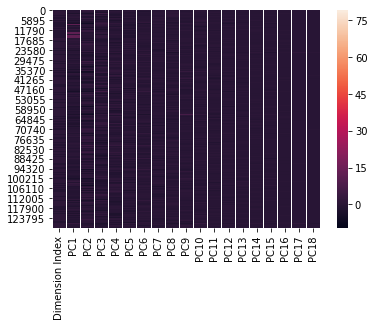

In [23]:
%%time

import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML 
from pylab import rcParams

import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

%matplotlib inline

sb.heatmap(df_pca)

<a id="Section 4: Modeling"></a>

## Section 4: Modeling

<a id="Section 4.1: Logistic Regression"></a>

## Section 4.1: Logistic Regression

The following cell runs a logistic regression using the default parameters. Unlike the Support Vector Models (discussed below), the Logistic Regression models use all the attributes and all the instances in the concatenated dataset (129,685 rows).

<b>Runtime Expectation:</b> The following cell runs in about 30 seconds.

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit

num_cv_iterations = 1

df_test = df_final.copy(deep=True)   # <-- All 129,685 rows

y = df_test['Dimension Index'].values
del df_test['Dimension Index']

X = df_test[cols[1:]].values   # <-- ALL attirube (except the target variable)

num_instances = len(y)

cv_object = ShuffleSplit(n_splits=num_cv_iterations, test_size=0.2)
                         
print(cv_object)

lr_clf = LogisticRegression()   # Default parms

for train_indices, test_indices in cv_object.split(X, y):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    lr_clf.fit(X_train, y_train)  # train object

    y_hat = lr_clf.predict(X_test) # get test set predictions
    
    acc = mt.accuracy_score(y_test, y_hat)
    conf = mt.confusion_matrix(y_test, y_hat)

    print("Accuracy:", acc )
    print("Confusion matrix:\n", conf)

As shown above, the accuracy score for this Logistic Regresson is about 0.84 with default paramaters. The value of accuracy can be calculated from the confusion matrix as (1310 + 2,673) / (1310 + 2,673 + 343 + 183) or the sum of (True Positives + True Negatives) / (the sum of all values: True Positive, True Negative, False Positve, and False Negative).

### Section 4.1.1: Attribute Weights

The cell below prints out the weight for each attribute in the Logistic Regression.

<b>Runtime expectation:</b> The cell below runs in less than a second.

In [ ]:
%%time

weights = lr_clf.coef_.T   # Transpose to make a column vector

variable_names = df_final.columns

for coef, name in zip(weights, variable_names):
    print(name, 'has weight of', coef[0])

### Section 4.1.2: Attribute Weights (with scaling)

The cell below prints out the weight for each attribute in the Logistic Regression (after scaling). Note that accuracy improves a bit (about .88 vs. about .85).

<b>Runtime expectation:</b> The cell below runs in about 10 to 15 seconds.

In [ ]:
%%time

scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train_scaled = scl_obj.transform(X_train)
X_test_scaled = scl_obj.transform(X_test)

lr_clf = LogisticRegression(penalty='l2', C=0.05)
lr_clf.fit(X_train_scaled, y_train)

y_hat = lr_clf.predict(X_test_scaled)

acc = mt.accuracy_score(y_test, y_hat)
conf = mt.confusion_matrix(y_test, y_hat)

print('Accuracy:', acc )
print(conf )

zip_vars = zip(lr_clf.coef_.T, df_final.columns)
zip_vars = sorted(zip_vars)

for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

### Section 4.1.3: Plot the Weights (with scaling)

With over 100 attributes, the follow bar plot is not very pretty. (The labels, for example, are unreadable). It does, however, give a visual clue into the attributes and their weights.

<b>Runtime expectation:</b> The cell below runs in just a few seconds.

In [ ]:
%%time

%matplotlib inline

plt.style.use('ggplot')

weights = pd.Series(lr_clf.coef_[0], index=df_final.columns[1:])

weights.plot(kind='bar')

plt.show()

### Section 4.1.4: Interpretting the Weights

The first 10 sorted attributes (by weight after scaling) is shown below:

> Motion Distribution-Variance has weight of -2.51974347148  
> Short time energy-Mean has weight of -1.39512309456  
> ZCR-Variance has weight of -1.33520317615  
> Motion Distribution-Bin 13 has weight of -1.20928601292  
> Attribute 58 should be Bin 40 has weight of -0.818619501619  
> Text area distribution-Bin 7-Mean has weight of -0.712396779843  
> Text area distribution-Bin 12-Variance has weight of -0.690287908028  
> Spectral Flux-Variance has weight of -0.678467583285  
> Spectral Roll off-Variance has weight of -0.572899154928  
> Fundamental Frequency-Variance has weight of -0.391339499589  

Surprisingly, the attribute 'Shot Length' is not in the top 10 most important weighted attributes.

### Section 4.1.5: Adjusting paramaters (the C value)

The Logistic Regression model above used default paramaters in the classifier. The cell below changes the C value from 0.05 to 1.50 (5% to 150%) to see if it can capture the highest accuracy within that C value range.

<b>Runtime expectation:</b> The following cell runs in about 10 to 15 minutes.

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

def do_lr(c):
    lr_clf = LogisticRegression(C=c)   # Default parms, except the C value

    for train_indices, test_indices in cv_object.split(X, y):
        X_train = X[train_indices]
        y_train = y[train_indices]
    
        X_test = X[test_indices]
        y_test = y[test_indices]

        lr_clf.fit(X_train, y_train)

        y_hat = lr_clf.predict(X_test)

        acc = mt.accuracy_score(y_test, y_hat)
        conf = mt.confusion_matrix(y_test, y_hat)

        return acc, conf

############################################################################################################
############################################################################################################

c_parms = [5]

for i in np.arange(1, 30):
    c_parms.append(c_parms[i-1] + int(5))

highest_acc = 0.0
highest_c = 0.0
highest_conf = [[]]

for i in np.arange(0, 30):
    acc, conf = do_lr(c_parms[i] / 100)

    if acc > highest_acc:
        highest_acc = acc
        highest_c = c_parms[i]
        highest_conf = conf
        
print('Highest accuracy:', highest_acc, ', C:', highest_c, ', Confusion matrix:', highest_conf)

As shown above, the cell above will capture the C value with the highest accuracy (which is generally close to the default).

### Section 4.1.6: Adjusting paramaters (the solvers)

The cell below uses default parameters except for the solver='sag' (Stochastic Average Gradient descent solver). 

<b>Runtime Expectation:</b> The following cell runs in about 30 seconds.

In [ ]:
%%time

lr_clf = LogisticRegression(solver='sag')    # Default parms: penalty='l2', C=1.0, class_weight=None, 

for train_indices, test_indices in cv_object.split(X, y):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    lr_clf.fit(X_train, y_train)  # train object

    y_hat = lr_clf.predict(X_test) # get test set predictions

    acc = mt.accuracy_score(y_test, y_hat)
    conf = mt.confusion_matrix(y_test, y_hat)

    print("Accuracy:", acc )
    print("Confusion matrix:\n", conf)

As shown in the cell above, the accuracy score for this linear regresson, sag with an accuracy of about 0.78 is much lower than using the default solver='liblinear' with an accuracy generally greater than 0.88.

The cell below uses default parameters except for the solver='saga' (another Stochastic Average Gradient descent solver).

<b>Runtime Expectation:</b> The following cell runs in about 30 to 40 seconds.

In [ ]:
%%time

lr_clf = LogisticRegression(solver='saga')   # Default parms: penalty='l2', C=1.0, class_weight=None,

for train_indices, test_indices in cv_object.split(X, y):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    
    lr_clf.fit(X_train, y_train)  # train object

    y_hat = lr_clf.predict(X_test) # get test set predictions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    
    acc = mt.accuracy_score(y_test, y_hat)
    conf = mt.confusion_matrix(y_test, y_hat)

    print("Accuracy:", acc )
    print("Confusion matrix:\n", conf)

As shown in the cell above, solver='saga' has an accuracy of about 0.77, which is also much lower than using the default solver='liblinear' having an accuracy generally greater around 0.85 or so.

<a id="Section 4.2: Support Vector Machines"></a>

## Section 4.2: Support Vector Machines

While the Logistic Regression models ran in 30 seconds or so (and about 15 minutes for optimized parameter selection), the Support Vector Machine models tend to run much longer. All five datases concatenated (df_concat), for example, takes nearly an hour to run on the same machine. Consequently, the cell below uses the CNN dataset (about one-fifth of concatenated dataset) to get an idea of how well the SVM models are predicting the target variable: Commercial vs. Non-commercial. (Based on the Hex Bin plots, the CNN dataset was visually similar to the CNNIBN, NDTV, and TIMESNOW datasets, whereas the BBC dataset was somewhat different.)

<b>Runtime Expectation:</b> The following cell runs in about 5 to 10 minutes.

In [ ]:
%%time

from sklearn.model_selection import ShuffleSplit

num_cv_iterations = 1

df_test = df_cnn.copy(deep=True)   # <-- 1/5 of the df_concat dataset (22,545 rows of 129,865)

y = df_test['Dimension Index'].values
del df_test['Dimension Index']

X = df_test[cols[1:]].values   # <-- All atttributes (excepts the target variable)

num_instances = len(y)

print(num_instances)

cv_object = ShuffleSplit(n_splits=num_cv_iterations, test_size=0.2)
                         
print(cv_object)

from sklearn.svm import SVC

svm_clf = SVC()    # Support Vector Machine using the default parms

for train_index, test_index in cv_object.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)

    X_train = X[train_index]
    y_train = y[train_index]

    X_test = X[test_index]
    y_test = y[test_index]

    svm_clf.fit(X_train, y_train)

    y_hat = svm_clf.predict(X_test) # get test set predictions

    acc = mt.accuracy_score(y_test, y_hat)
    conf = mt.confusion_matrix(y_test, y_hat)

    print("Accuracy:", acc)
    print("Confusion matrix:\n", conf)

As shown in the output above, the SVC classifier run against just the CNN dataset takes at least 5 minutes with an accuracy of about 0.64 (quite low compared to the Logistic Regression models).

### Section 4.2.1: SGDClassifier

In contrast, the SGDClassifier classifier below runs the enitre dataset (all five broadcasts) in less than a second with an improved accuracy of about 0.77 (but still lagging behind Logistic Regression).

<b>Runtime Expectation</b>: The following cell runs in less than a second.

In [ ]:
%%time

num_cv_iterations = 1

df_test = df_final.copy(deep=True)   # <-- 1/5 of the df_concat dataset (22,545 rows of 129,865)

y = df_test['Dimension Index'].values
del df_test['Dimension Index']

X = df_test[cols[1:]].values   # <-- All atttributes (excepts the target variable)

num_instances = len(y)

print(num_instances)

cv_object = ShuffleSplit(n_splits=num_cv_iterations, test_size=0.2)
                         
print(cv_object)

from sklearn.linear_model import SGDClassifier

svm_clf = SGDClassifier()   # Default loss='hinge' -- SVM

print(svm_clf)

for train_indices, test_indices in cv_object.split(X, y):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    svm_clf.fit(X_train, y_train)  # train object

    y_hat = svm_clf.predict(X_test) # get test set predictions
    
    acc = mt.accuracy_score(y_test, y_hat)
    conf = mt.confusion_matrix(y_test, y_hat)

    print("Accuracy:", acc )
    print("Confusion matrix:\n", conf)

<a id="Section 4: Modeling (New)"></a>

## <span style="color:red">Section 4: Modeling (New)</span>

<a id="Section 4.1: Linear Regression"></a>

## <span style="color:red">Section 4.1: Linear Regression</span>

Although is is clear from the attribute weighting that the attribute 'Shot Length' is not in the top 10 most important weighted attributes, it is still going to be useful to run a Linear Regression to attempt to estimate its value.

<b>Runtime Expectation:</b> The following cell runs in about 30 seconds.

In [46]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score

num_cv_iterations = 1

df_test = df_final.copy(deep=True)   # <-- All 129,685 rows

y = df_test['Dimension Index'].values
del df_test['Dimension Index']

X = df_test[cols[1:2]].values   # <-- ALL attirube (except the target variable)

print(X)

num_instances = len(y)

cv_object = ShuffleSplit(n_splits=num_cv_iterations, test_size=0.2)
                         
print(cv_object)

#lr_clf = LogisticRegression()   # Default parms
lr_clf = LinearRegression()   # Default parms

for train_indices, test_indices in cv_object.split(X, y):
    print('.')
    X_train = X[train_indices]
    y_train = y[train_indices]

    X_test = X[test_indices]
    y_test = y[test_indices]

    lr_clf.fit(X_train, y_train)  # train object

    y_hat = lr_clf.predict(X_test) # get test set predictions

    print('Coefficients: \n', lr_clf.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(X_test, y_hat))
    print('Variance score: %.2f' % r2_score(X_test, y_hat))

    
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_hat, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()    

[[ 123.]
 [ 124.]
 [ 109.]
 ..., 
 [ 100.]
 [  60.]
 [  25.]]
ShuffleSplit(n_splits=1, random_state=None, test_size=0.2, train_size=None)
.
Coefficients: 
 [-0.000776]
Mean squared error: 84510.28
Variance score: -0.16


NameError: name 'plt' is not defined

In [ ]:
for train_indices, test_indices in cv_object.split(X, y):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    lr_clf.fit(X_train, y_train)  # train object

    y_hat = lr_clf.predict(X_test) # get test set predictions
    
    acc = mt.accuracy_score(y_test, y_hat)
    conf = mt.confusion_matrix(y_test, y_hat)

    print("Accuracy:", acc )
    print("Confusion matrix:\n", conf)

In [28]:
%%time

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

df_test = df_bbc_bow.copy(deep=True)

y = df_test['Dimension Index'].values
del df_test['Dimension Index']

X = df_test[cols_bow[1:]].values   # <-- ALL attirubes (except the target variable)

cv_object = StratifiedKFold(n_splits=10)

clf = RandomForestClassifier(n_estimators=150,random_state=1)

acc = cross_val_score(clf, X, y=y, cv=cv_object)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

#lr_clf = LinearRegression(C=50)   # Default parms, except the C value


KeyboardInterrupt: 

In [45]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt

def do_lr(c):
    lr_clf = LinearRegression(C=c)   # Default parms, except the C value

    for train_indices, test_indices in cv_object.split(X, y):
        X_train = X[train_indices]
        y_train = y[train_indices]
    
        X_test = X[test_indices]
        y_test = y[test_indices]

        lr_clf.fit(X_train, y_train)

        y_hat = lr_clf.predict(X_test)

        acc = mt.accuracy_score(y_test, y_hat)
        conf = mt.confusion_matrix(y_test, y_hat)

        return acc, conf

############################################################################################################
############################################################################################################

c_parms = [5]

for i in np.arange(1, 30):
    c_parms.append(c_parms[i-1] + int(5))

highest_acc = 0.0
highest_c = 0.0
highest_conf = [[]]

for i in np.arange(0, 30):
    acc, conf = do_lr(c_parms[i] / 100)

    if acc > highest_acc:
        highest_acc = acc
        highest_c = c_parms[i]
        highest_conf = conf
        
print('Highest accuracy:', highest_acc, ', C:', highest_c, ', Confusion matrix:', highest_conf)

TypeError: __init__() got an unexpected keyword argument 'C'